<a href="https://colab.research.google.com/github/alexiaddiaz0907/DSC410/blob/master/1st_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1Rn-D6pzM8fRkv1O8bEsAa-vK5CVy-l-F/view?usp=sharing'

import spacy 
import numpy as np
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import glob

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#import pyLDavis
#import PyLDavis.gensim_models

import warnings

nlp = spacy.load("en_core_web_sm")
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('employee_reviews') 
 
df = pd.read_csv('employee_reviews', encoding='latin-1')
print(df)

       Unnamed: 0    company           location          dates  \
0               1     google               none   Dec 11, 2018   
1               2     google  Mountain View, CA   Jun 21, 2013   
2               3     google       New York, NY   May 10, 2014   
3               4     google  Mountain View, CA    Feb 8, 2015   
4               5     google    Los Angeles, CA   Jul 19, 2018   
...           ...        ...                ...            ...   
67524       67525  microsoft               none   Dec 16, 2010   
67525       67526  microsoft               none   Dec 16, 2010   
67526       67527  microsoft               none   Dec 15, 2010   
67527       67528  microsoft               none   Dec 15, 2010   
67528       67529  microsoft               none   Dec 14, 2010   

                                         job-title  \
0            Current Employee - Anonymous Employee   
1                Former Employee - Program Manager   
2         Current Employee - Software Enginee

## **Exploratory Analysis **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  67529 non-null  int64 
 1   company                     67529 non-null  object
 2   location                    67529 non-null  object
 3   dates                       67529 non-null  object
 4   job-title                   67529 non-null  object
 5   summary                     67409 non-null  object
 6   pros                        67529 non-null  object
 7   cons                        67529 non-null  object
 8   advice-to-mgmt              67232 non-null  object
 9   overall-ratings             67529 non-null  int64 
 10  work-balance-stars          67529 non-null  object
 11  culture-values-stars        67529 non-null  object
 12  carrer-opportunities-stars  67529 non-null  object
 13  comp-benefit-stars          67529 non-null  ob

In [ ]:
# Find Duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
67524    False
67525    False
67526    False
67527    False
67528    False
Length: 67529, dtype: bool

In [ ]:
df = df.drop(columns=['link', 'helpful-count'])
df = df.drop(df.columns[0],axis = 1)
print(df)

         company           location          dates  \
0         google               none   Dec 11, 2018   
1         google  Mountain View, CA   Jun 21, 2013   
2         google       New York, NY   May 10, 2014   
3         google  Mountain View, CA    Feb 8, 2015   
4         google    Los Angeles, CA   Jul 19, 2018   
...          ...                ...            ...   
67524  microsoft               none   Dec 16, 2010   
67525  microsoft               none   Dec 16, 2010   
67526  microsoft               none   Dec 15, 2010   
67527  microsoft               none   Dec 15, 2010   
67528  microsoft               none   Dec 14, 2010   

                                         job-title  \
0            Current Employee - Anonymous Employee   
1                Former Employee - Program Manager   
2         Current Employee - Software Engineer III   
3            Current Employee - Anonymous Employee   
4              Former Employee - Software Engineer   
...                        

In [ ]:
import numpy as np
## Drop missing values
df.dropna(inplace=True)


In [ ]:
#Find missing values 
df.isna().sum()

company                       0
location                      0
dates                         0
job-title                     0
summary                       0
pros                          0
cons                          0
advice-to-mgmt                0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
dtype: int64

In [ ]:
# Print company values 
print(df['company'].value_counts())

amazon       26283
microsoft    17830
apple        12858
google        7775
facebook      1578
netflix        798
Name: company, dtype: int64


In [ ]:
amazon_reviews = df.loc[df['company'] == 'amazon']

print(amazon_reviews)

      company                  location          dates  \
7819   amazon               Phoenix, AZ           None   
7820   amazon             Sunnyvale, CA   Dec 10, 2018   
7821   amazon               Seattle, WA   Jan 10, 2016   
7822   amazon               Seattle, WA   Feb 20, 2016   
7823   amazon               Seattle, WA   Dec 17, 2013   
...       ...                       ...            ...   
34244  amazon     Burghaslach (Germany)   Feb 26, 2016   
34245  amazon  Munich, Bayern (Germany)    Mar 6, 2016   
34246  amazon          Kassel (Germany)   Feb 22, 2016   
34247  amazon            Paris (France)   Feb 22, 2016   
34248  amazon    Hard Bargain (Jamaica)   Feb 22, 2016   

                                               job-title  \
7819     Current Employee - Software Development Manager   
7820   Current Employee - Manager, Software Developme...   
7821               Current Employee - Anonymous Employee   
7822       Current Employee - Senior Engineering Manager   
782

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


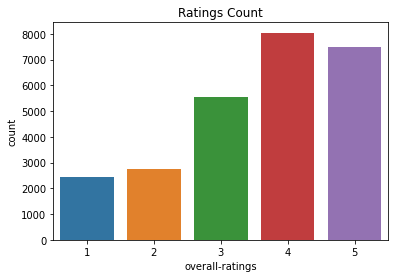

In [ ]:
sns.countplot(amazon_reviews['overall-ratings']).set(title = 'Ratings Count');

In [ ]:
import pandas as pd


ratings_count = pd.DataFrame(amazon_reviews['overall-ratings'].value_counts())
ratings_count['percentage'] = ratings_count['overall-ratings']/ratings_count['overall-ratings'].sum()
print(ratings_count)

   overall-ratings  percentage
4             8041    0.305939
5             7493    0.285089
3             5554    0.211315
2             2743    0.104364
1             2452    0.093292


In [ ]:
#Delete neutral reviews 
amazon_reviews = amazon_reviews[amazon_reviews['overall-ratings'] != 3]


In [ ]:
#sentiment labeling 
amazon_reviews['sentiment'] = amazon_reviews['overall-ratings'].apply(lambda rating : +1 if rating > 3 else -1)
amazon_reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,sentiment
7819,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5,4,5,5,5,5,1
7820,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5,5,5,5,4,5,1
7821,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5,4,5,5,5,5,1
7823,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4,3,3,5,5,4,1
7824,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4,2,2,1,5,1,1


In [ ]:
# split df - positive and negative sentiment:

positive = amazon_reviews[amazon_reviews['sentiment'] == 1]
negative = amazon_reviews[amazon_reviews['sentiment'] == -1]

In [ ]:
#drop any na values 
positive = positive.dropna()
negative = negative.dropna()

In [ ]:
#Total Count of neg and positive reviews
import pandas as pd

pd.crosstab(index = amazon_reviews['sentiment'], columns="Total count")

col_0,Total count
sentiment,
-1,5195
1,15534


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


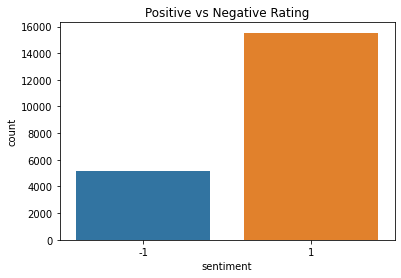

In [ ]:
#graph illustrating postive vs negative reviews
sns.countplot(amazon_reviews['sentiment']).set(title = 'Positive vs Negative Rating');

In [ ]:
! pip install wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


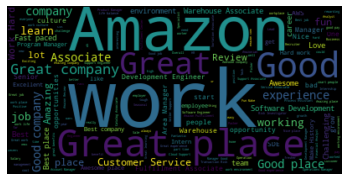

In [ ]:
#Create Word Cloud of Pos Reviews 

! pip install wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))
pos = " ".join(review for review in positive.summary)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

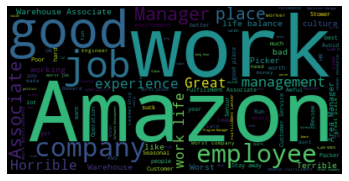

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
negreviews = " ".join(review for review in negative.summary)
wordcloud = WordCloud(stopwords=stopwords).generate(negreviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

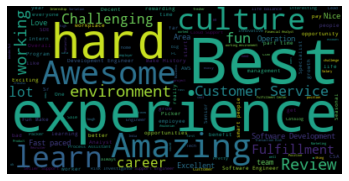

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))
stopwords.update(["amazon","work","job", "good", 'great', "place", "associate","company","Warehouse", "Manager"]) 
## Updated the stop words to removed words because they were included in negative sentiment
pos = " ".join(review for review in positive.summary)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

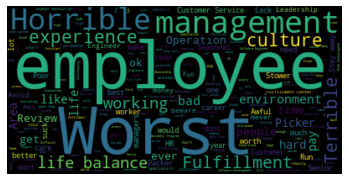

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
stopwords.update(["amazon","work","job", "good", 'great', "place", "associate","company","Warehouse", "Manager"]) 
## Updated the stop words to removed words because they were included in negative sentiment
negreviews = " ".join(review for review in negative.summary)
wordcloud = WordCloud(stopwords=stopwords).generate(negreviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

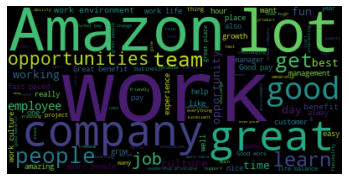

In [ ]:
#Word Cloud for neg column 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
pos = " ".join(review for review in positive.pros)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

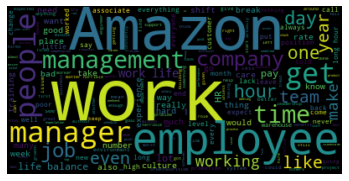

In [ ]:
# Word Cloud for neg column 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))
pos = " ".join(review for review in negative.cons)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Data Cleaning **

In [ ]:
from matplotlib import text
import string 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords = set(stopwords.words('english'))
stopwords.update(["amazon","work","job", "good", 'great', "place", "associate","company","Warehouse", "Manager"]) 
stopword = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()


def remove_xml(text):
    return re.sub(r'<[^<]+?>', '', text)

def remove_newlines(text):
    return text.replace('\n', ' ') 

def remove_manyspaces(text):
    return re.sub(r'\s+', ' ', text)

def tokenize(text):
    split=re.split("\W+",text) 
    return split

def remove_punctuation(text):
  no_punct=[words for words in text if words not in string.punctuation]
  words_wo_punct = ''.join(no_punct)
  return text

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

def clean_text(text):
    text = remove_xml(text)
    text = remove_newlines(text)
    text = remove_manyspaces(text)
    text = tokenize(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return(text)

 

amazon_reviews['cleaned_reviews'] = amazon_reviews['summary'].apply(lambda x: clean_text(x))
amazon_reviews.head()


<>:25: DeprecationWarning: invalid escape sequence \W
<>:25: DeprecationWarning: invalid escape sequence \W
<ipython-input-147-0bb91f11918b>:25: DeprecationWarning: invalid escape sequence \W
  split=re.split("\W+",text)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,...,comp-benefit-stars,senior-mangemnet-stars,sentiment,cleaned_reviews,cleaned_reviews_2,scores,compound,compound_score,label,random_number
7819,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5,4,...,5,5,1,"[An, Amazing, Place, Work]","[An, Amazing, Place, Work]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,0.283553
7820,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5,5,...,4,5,1,"[Software, Development, Engineering, Manager]","[Software, Development, Engineering, Manager]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,0.356890
7821,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5,4,...,5,5,1,"[You, Get, What, You, Put, In]","[You, Get, What, You, Put, In]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,0.058090
7823,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4,3,...,5,4,1,"[Can, amazing, people, horrible, others]","[Can, amazing, people, horrible, others]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,-0.059904
7824,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4,2,...,5,1,1,"[We, world, condescended, inferiors]","[We, world, condescended, inferiors]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,-1.032188


In [ ]:
# Get the lemmas of words from wordnet corpus reader
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def clean_text2(text):
  text = [word.strip(string.punctuation) for word in text.split(" ")]
  text = [word for word in text if not any(c.isdigit() for c in word)]
  pos_tags = pos_tag(text)
  text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
  text = [t for t in text if len(t) >= 3]
  text = " ".join(text)
  return(text)


amazon_reviews['cleaned_reviews_2'] = amazon_reviews['summary'].apply(lambda x: clean_text(x))
amazon_reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,...,comp-benefit-stars,senior-mangemnet-stars,sentiment,cleaned_reviews,cleaned_reviews_2,scores,compound,compound_score,label,random_number
7819,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5,4,...,5,5,1,"[An, Amazing, Place, Work]","[An, Amazing, Place, Work]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,0.283553
7820,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5,5,...,4,5,1,"[Software, Development, Engineering, Manager]","[Software, Development, Engineering, Manager]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,0.356890
7821,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5,4,...,5,5,1,"[You, Get, What, You, Put, In]","[You, Get, What, You, Put, In]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,0.058090
7823,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4,3,...,5,4,1,"[Can, amazing, people, horrible, others]","[Can, amazing, people, horrible, others]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,-0.059904
7824,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4,2,...,5,1,1,"[We, world, condescended, inferiors]","[We, world, condescended, inferiors]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,postive,-1.032188


# **Vader Sentiment & LDA Modeling **
```



In [ ]:
# LDA Topic Modeling 

text_data = amazon_reviews['cleaned_reviews_2']


id2word = corpora.Dictionary(text_data)
texts = text_data

corpus = [id2word.doc2bow(word) for word in texts]
print(corpus)



[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1), (11, 1), (12, 2)], [(13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(18, 1), (19, 1), (20, 1), (21, 1)], [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(36, 1), (37, 1), (38, 1)], [(39, 1), (40, 1)], [(22, 1), (41, 1), (42, 1)], [(43, 1), (44, 1), (45, 1), (46, 1)], [(3, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(51, 1), (52, 1), (53, 1)], [(6, 1), (54, 1)], [(55, 1), (56, 1)], [(37, 1), (57, 1)], [(17, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(62, 1), (63, 1), (64, 1)], [(3, 1), (28, 1), (65, 1), (66, 1)], [(22, 1), (67, 1), (68, 1)], [(67, 1), (69, 1)], [(4, 1), (6, 1), (7, 1)], [(6, 1), (70, 1), (71, 1)], [(72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2)], [(35, 1), (72, 1), (78, 1), (79, 1)], [(80, 1), (81, 1), (82, 1)], [(44, 1), (83, 1)], [(65, 1), (84, 1)], [(85, 1), (86, 1), (87, 1)], [(2, 1), (3, 

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = id2word, num_topics = 10, random_state = 100, update_every = 1, chunksize = 100, passes = 10, alpha = "auto")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds = "mmds", R = 20)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.234103  0.379331       1        1  24.141428
9     -0.037813 -0.386468       2        1  11.738082
3     -0.271434 -0.192604       3        1   8.999008
5     -0.209801  0.210117       4        1   8.488552
6      0.141187 -0.219281       5        1   8.437522
8      0.336808 -0.116428       6        1   8.015311
4     -0.032510  0.258822       7        1   7.785345
7     -0.047374 -0.062090       8        1   7.730224
2     -0.341637  0.044471       9        1   7.342778
1      0.228472  0.084131      10        1   7.321750, topic_info=          Term         Freq        Total Category  logprob  loglift
89        work  2850.000000  2850.000000  Default  20.0000  20.0000
67      Amazon  1550.000000  1550.000000  Default  19.0000  19.0000
90              2606.000000  2606.000000  Default  18.0000  18.0000
88     company  1259.000000  1259.000000  Default  17.0000  17.0000
35       place  1838.000000  1838.000000  Default  16.0000  16.0000
...        ...          ...          ...      ...      ...      ...
1178  employer    25.831408    26.565877  Topic10  -5.2581   2.5863
821      Learn    25.176250    25.910715  Topic10  -5.2838   2.5856
6130   digital    66.473085    77.343833  Topic10  -4.3129   2.4629
7374        du    41.894790    89.169147  Topic10  -4.7745   1.8589
7239     bonne    28.335908   157.374049  Topic10  -5.1655   0.8998

[229 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
90        1  0.999820           
161       7  0.995430          1
72        1  0.998703          A
173       4  0.995516        AWS
118       4  0.985403    Account
...     ...       ...        ...
53        4  0.998931    working
323       1  0.996872  workplace
27        4  0.992610      years
5750      8  0.978720          Ã
5750     10  0.007415          Ã

[275 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 4, 6, 7, 9, 5, 8, 3, 2])

In [ ]:
! pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

amazon_reviews['scores'] = amazon_reviews['cleaned_reviews_2'].apply(lambda review:analyzer.polarity_scores(review))
amazon_reviews['compound'] = amazon_reviews['scores'].apply(lambda score: score['compound'])
amazon_reviews.head()





,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,sentiment,cleaned_reviews,cleaned_reviews_2,scores,compound
7819,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5,4,5,5,5,5,1,"[An, Amazing, Place, Work]","[An, Amazing, Place, Work]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
7820,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5,5,5,5,4,5,1,"[Software, Development, Engineering, Manager]","[Software, Development, Engineering, Manager]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
7821,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5,4,5,5,5,5,1,"[You, Get, What, You, Put, In]","[You, Get, What, You, Put, In]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
7823,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4,3,3,5,5,4,1,"[Can, amazing, people, horrible, others]","[Can, amazing, people, horrible, others]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
7824,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4,2,2,1,5,1,1,"[We, world, condescended, inferiors]","[We, world, condescended, inferiors]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [ ]:
def compound_score(score):
  if score < 0:
    return 'negative'
  elif score > 0:
    return 'positive'
  else:
    return 'neutral'

amazon_reviews['compound_score'] = amazon_reviews['compound'].apply(compound_score)
amazon_reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,sentiment,cleaned_reviews,cleaned_reviews_2,scores,compound,compound_score
7819,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5,4,5,5,5,5,1,"[An, Amazing, Place, Work]","[An, Amazing, Place, Work]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
7820,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,5,5,5,5,4,5,1,"[Software, Development, Engineering, Manager]","[Software, Development, Engineering, Manager]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
7821,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5,4,5,5,5,5,1,"[You, Get, What, You, Put, In]","[You, Get, What, You, Put, In]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
7823,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4,3,3,5,5,4,1,"[Can, amazing, people, horrible, others]","[Can, amazing, people, horrible, others]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
7824,amazon,"Seattle, WA","Mar 23, 2017",Former Employee - Anonymous Employee,We are now in a world where we are condescende...,This company gets A list performance from C li...,Maybe because the company recruits C listers w...,Bezos you bought the Washington Post and hired...,4,2,2,1,5,1,1,"[We, world, condescended, inferiors]","[We, world, condescended, inferiors]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral


In [ ]:
def labels(score):
  if score < 3:
    return 'negative'
  elif score > 3:
    return 'postive'
  else:
    return 'netural'

amazon_reviews['label'] = amazon_reviews['overall-ratings'].apply(labels)


  

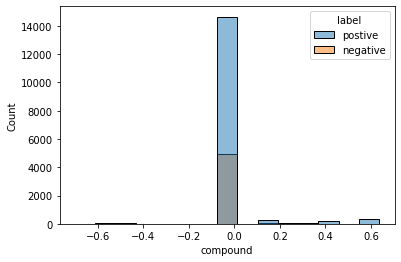

In [ ]:
sns.histplot(x = 'compound', data=amazon_reviews, bins=15,hue='label');

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(amazon_reviews['label'], amazon_reviews['compound_score'])

0.007332722273143905

# **Creating Bag of Words & Machine Learning **

In [ ]:
amazon_reviews.shape

(20729, 21)

In [ ]:
# random split train and test data
index = amazon_reviews.index
amazon_reviews['random_number'] = np.random.randn(len(index))
train = amazon_reviews[amazon_reviews['random_number'] <= 0.8]
test = amazon_reviews[amazon_reviews['random_number'] > 0.2]

In [ ]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['summary'])
test_matrix = vectorizer.transform(test['summary'])

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=6000)

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=6000)

In [ ]:
predictions = lr.predict(X_test)
print(predictions)

[1 1 1 ... 1 1 1]


In [ ]:
# find accuracy, precision, recall:

from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[1209,  365],
       [ 969, 6091]])

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.56      0.77      0.64      1574
           1       0.94      0.86      0.90      7060

    accuracy                           0.85      8634
   macro avg       0.75      0.82      0.77      8634
weighted avg       0.87      0.85      0.85      8634



In [ ]:
# Use score method to get accuracy of model
from sklearn import metrics
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(predictions,y_test))

The accuracy of the Logistic Regression is 0.8454945564049108


# **Multinomial Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split


cv=CountVectorizer()


train_data,test_data = train_test_split(amazon_reviews,train_size=0.8,random_state=0)

X_train = cv.fit_transform(train_data['summary'])
y_train = train_data['sentiment']
X_test = cv.transform(test_data['summary'])
y_test = test_data['sentiment']

In [ ]:
print(X_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nb_predict=nb.predict(X_test)

In [ ]:
nb_report = accuracy_score(y_test,nb_predict)
print('Accuracy:',nb_report)

Accuracy: 0.8253738543174144


In [ ]:
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

          -1       0.74      0.47      0.57      1038
           1       0.84      0.94      0.89      3108

    accuracy                           0.83      4146
   macro avg       0.79      0.71      0.73      4146
weighted avg       0.82      0.83      0.81      4146

